# Perceptron

This program will demonstrate the use of a Rosenblatt's perceptron rule applied to the famous iris dataset provided by scikit-learn library. Our perceptron class will allow us train and test our dataset to help classify future datasets. A perceptron is a representation of a neuro network. Information is fed into the dendrites, stored in the cell body, and fired through the axon, which releases an output. We will create a representation of a perceptron which will pass data to a Perceptron class. This data then gets fitted to learn the data and then predict the output after being passed through our activication function, which uses a step function. Weights are then produced and updated for the next iteration.

In [312]:
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = [15, 7]

First we will need to create a class called perceptron. This class will have a default constructor, a fit function, calculation function, and a prediction function

In [313]:
class Perceptron(object):
    """
    Perceptron classifier
    @param
        eta     : float, learning rate between 0.0 and 1.0
        n_iter  : int, iterate through our training set
        w_      : 1d-array, weights after filtering
        errors_ : list, numbers of misclassification
    """
    
    # Constructor
    def __init__(self, eta=0.1, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    # Fitting our data
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    # Calculate input
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    # Return classification label after unit step
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Loading Iris dataset into dataframe

In [314]:
# Load the dataset
iris = load_iris()

data = pd.read_csv('https://archive.ics.uci.edu/ml/'
                   'machine-learning-databases/iris/iris.data', header=None)

data.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


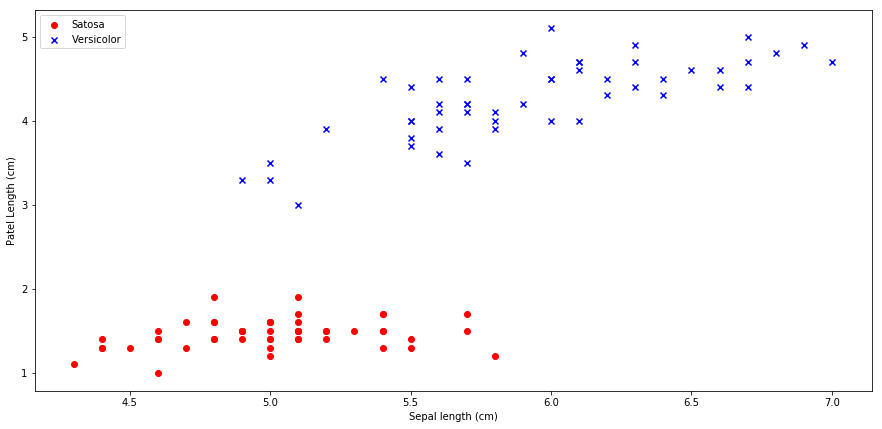

In [315]:
# Split the data from index 0-99 and pull out col 0 and 2
X = data.iloc[0:100, [0,2]].values

# Split data into response array
y = data.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# Scatter plot the data
plt.scatter(x = X[:50, 0],
            y = X[:50, 1],
            color = 'red', marker='o', label='Satosa')
plt.scatter(x = X[50:100, 0],
            y = X[50:100, 1],
            color = 'blue', marker='x', label='Versicolor')
plt.ylabel("Patel Length (cm)")
plt.xlabel('Sepal length (cm)')
plt.legend()
plt.show()

In the graph above, we can see that the is a boundry split between satosa and versicolor flowers. Setosa is associated with having smaller petal lengths as well as smaller sepal length. As for versicolor, the flowers have a wider spread in sepeal length and larger petel length as well.

Next, we will train our perceptron class in order to determine the classification boundry. Also, we will create our misclassification error to see where the boundry converges.

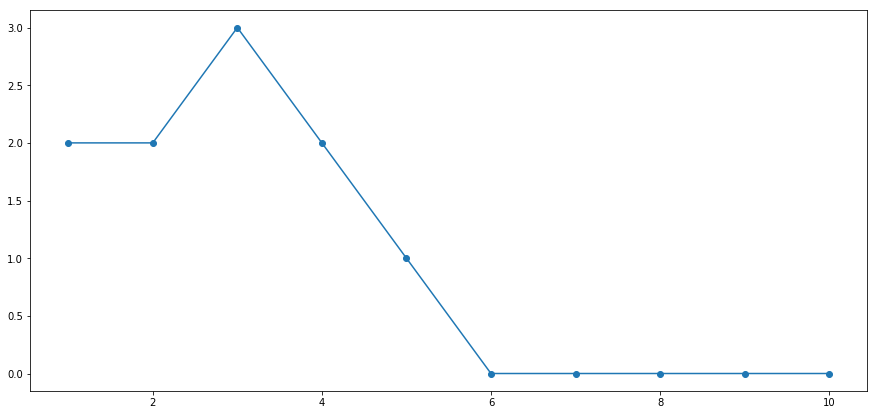

In [316]:
# Create a perceptron object
ppn = Perceptron(eta=0.1, n_iter=10)

# Fit the data with our split set
ppn.fit(X, y)

# Plot misclassification error
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.show()

Here we can see that the boundry converges at 6 epochs. This means that our sample will be able to classy any input perfectly after the 6th epochs.

In [325]:
from matplotlib.colors import ListedColormap

def plot_decision_region(X, y , classifier, resolution=.02):
    
    # Set up marker generator and color map
    marker = ('x', 'o')
    color = ('red', 'blue')
    cmap = ListedColormap(colors=color)
    
    # Plot decision surface
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, c in enumerate(np.unique(y)):
        cl = c
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=cmap(idx),
                   marker=marker[idx], label=cl)

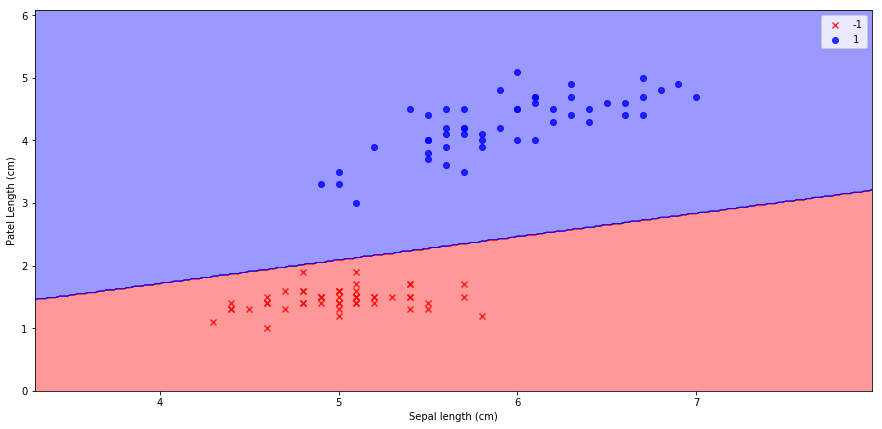

In [327]:
plot_decision_region(X, y, classifier=ppn)
plt.legend()
plt.ylabel("Patel Length (cm)")
plt.xlabel('Sepal length (cm)')
plt.show()

The graph above is a representation of a linear boundry for classification. Our perceptron was able to learn from the data and successfully classify out data to it's correct classification.